## Implementation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
## step 01 : Creating Linear data
np.random.seed(42)
X=2*np.random.rand(100,1)
true_w=3.5
true_b=1.25
y=true_w*X + true_b + np.random.rand(100,1) *0.5


In [4]:
## step 02 : Manual train-test-split data
# Shuffle data
data = np.hstack((X, y))
np.random.shuffle(data)

# Split indices
train_end = int(0.7 * len(data))
val_end = int(0.85 * len(data))

# Train (70%)
train_data = data[:train_end]
# Validation (15%)
val_data = data[train_end:val_end]
# Test (15%)
test_data = data[val_end:]

# Extract features and targets
X_train, y_train = train_data[:, 0:1], train_data[:, 1:2]
X_val, y_val = val_data[:, 0:1], val_data[:, 1:2]
X_test, y_test = test_data[:, 0:1], test_data[:, 1:2]

In [5]:
## step 03 : Initializing parameters
w=np.random.randn()
b=np.random.randn()
learning_rate=0.01
n_iterations=1000
m=X_train.shape[0]


In [7]:
## step 04 : Gradient descent Training loop
train_loss_history = []
val_loss_history = []

for i in range(n_iterations):
    # Predict on training data
    y_pred = w * X_train + b

    # Training loss (MSE)
    train_loss = (1/m) * np.sum((y_pred - y_train) ** 2)
    train_loss_history.append(train_loss)

    # Compute gradients
    dw = (2/m) * np.sum((y_pred - y_train) * X_train)
    db = (2/m) * np.sum(y_pred - y_train)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Validation loss (on unseen validation set)
    y_val_pred = w * X_val + b
    val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val) ** 2)
    val_loss_history.append(val_loss)

    # Print progress
    if i % 100 == 0:
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, w = {w:.4f}, b = {b:.4f}")

Iteration 0: Train Loss = 3.2370, Val Loss = 2.8711, w = 0.5765, b = 3.8742
Iteration 100: Train Loss = 1.1641, Val Loss = 1.6511, w = 1.7361, b = 3.5342
Iteration 200: Train Loss = 0.6186, Val Loss = 0.8937, w = 2.2210, b = 2.9838
Iteration 300: Train Loss = 0.3334, Val Loss = 0.4890, w = 2.5671, b = 2.5818
Iteration 400: Train Loss = 0.1841, Val Loss = 0.2743, w = 2.8174, b = 2.2910
Iteration 500: Train Loss = 0.1061, Val Loss = 0.1598, w = 2.9984, b = 2.0806
Iteration 600: Train Loss = 0.0652, Val Loss = 0.0984, w = 3.1294, b = 1.9285
Iteration 700: Train Loss = 0.0439, Val Loss = 0.0651, w = 3.2241, b = 1.8185
Iteration 800: Train Loss = 0.0327, Val Loss = 0.0469, w = 3.2926, b = 1.7389
Iteration 900: Train Loss = 0.0269, Val Loss = 0.0368, w = 3.3421, b = 1.6814


In [8]:
# Step 5: Final parameters
print("\nFinal Parameters:")
print(f"w = {w:.4f}, b = {b:.4f}")


Final Parameters:
w = 3.3776, b = 1.6401


In [9]:
# Step 6: Final evaluation on test data
y_test_pred = w * X_test + b
test_loss = (1/len(X_test)) * np.sum((y_test_pred - y_test) ** 2)
print(f"\nFinal Test MSE (on unseen data): {test_loss:.4f}")


Final Test MSE (on unseen data): 0.0343


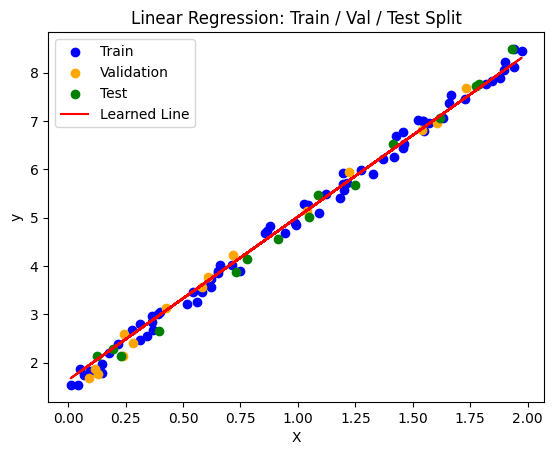

In [14]:
# Step 7: Plot training, validation data and prediction line
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_val, y_val, color='orange', label='Validation')
plt.scatter(X_test, y_test, color='green', label='Test')
plt.plot(X, w * X + b, color='red', label='Learned Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Train / Val / Test Split')
plt.legend()
plt.show()

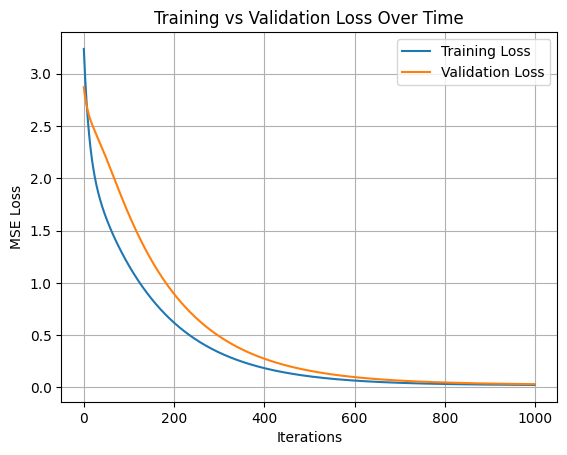

In [13]:
# Step 8: Plotting loss curves
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()